In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from lightgbm import LGBMClassifier

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#f1 = pd.read_csv('/kaggle/input/josaa-engineering-schools-seat-allocation-jee/2016.csv')
#f2 = pd.read_csv('/kaggle/input/josaa-engineering-schools-seat-allocation-jee/2017.csv')

#f3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2018.csv')
#f4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2019.csv')
f5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2020.csv')
f6 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2021.csv')
train = pd.concat([f5,f6])
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2022.csv')
total = pd.concat([train,test])
train.head(2)

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Year,Round
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Gender-Neutral,6836,8816,2020,1
1,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Female-only (including Supernumerary),13184,14366,2020,1


In [ ]:
train = train.dropna()
test = test.dropna()
non_integers = list(set(train["Opening Rank"][~train["Opening Rank"].apply(lambda x: str(x).isdigit())]))
print(non_integers)

['777P', '3P', '839P', '887P', '42P', '486P', '968P', '731P', '877P', '1088P', '663P', '226P', '472P', '569P', '1512P', '452P', '254P', '1174P', '665P', '350P', '118P', '58P', '1306P', '852P', '1055P', '12P', '415P', '2229P', '8P', '575P', '65P', '1240P', '1253P', '2444P', '607P', '175P', '258P', '265P', '978P', '1013P', '114P', '1025P', '255P', '708P', '2020P', '864P', '275P', '653P', '879P', '150P', '54P', '117P', '681P', '892P', '38P', '159P', '876P', '66P', '794P', '659P', '503P', '97P', '451P', '937P', '131P', '1153P', '76P', '442P', '722P', '870P', '62P', '22P', '422P', '875P', '958P', '1749P', '2108P', '14P', '193P', '377P', '292P', '124P', '800P', '1397P', '420P', '19P', '1225P', '805P', '424P', '761P', '1288P', '371P', '819P', '655P', '149P', '739P', '690P', '325P', '1355P', '1072P', '783P', '464P', '1396P', '303P', '85P', '18P', '599P', '152P', '969P', '356P', '493P', '60P', '217P', '557P', '610P', '1094P', '138P', '815P', '1079P', '195P', '192P', '1133P', '158P', '2339P', '7

In [ ]:
import re
def to_numeric(x):
    x = str(x)
    x = x.replace(",", "")
    x = re.sub("[a-zA-Z]", "", x)

    return float(x) if '.' in x else int(x)

# Convert train data columns to numeric and integer types
train["Opening Rank"] = train["Opening Rank"].apply(to_numeric)
train["Closing Rank"] = train["Closing Rank"].apply(to_numeric)
train["Opening Rank"] = train["Opening Rank"].astype(int)
train["Closing Rank"] = train["Closing Rank"].astype(int)

# Convert test data columns to numeric and integer types
test["Opening Rank"] = test["Opening Rank"].apply(to_numeric)
test["Closing Rank"] = test["Closing Rank"].apply(to_numeric)
test["Opening Rank"] = test["Opening Rank"].astype(int)
test["Closing Rank"] = test["Closing Rank"].astype(int)

# Check for non-integer values in the train data
non_integers = list(set(train["Opening Rank"][~train["Opening Rank"].apply(lambda x: str(x).isdigit())]))
print(len(non_integers))

0


In [ ]:
combined = pd.concat([train, test], axis=0)
# create an instance of the encoder
encoder = LabelEncoder()

# loop through each column to encode
for col in ['Institute', 'Academic Program Name']:
    # fit the encoder on the combined dataset
    encoder.fit(combined[col])
    # encode the training and testing data using the same encoder
    train[col] = encoder.transform(train[col])
    test[col] = encoder.transform(test[col])
train.head(2)

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Year,Round
0,41,46,AI,OPEN,Gender-Neutral,6836,8816,2020,1
1,41,46,AI,OPEN,Female-only (including Supernumerary),13184,14366,2020,1


In [ ]:
x_train = train.drop(["Academic Program Name", "Institute"], axis=1)
x_test = test.drop(["Academic Program Name", "Institute"], axis=1)
total = pd.concat([train,test])
total.corr()

<ipython-input-6-595ff52216d6>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Institute,Academic Program Name,Opening Rank,Closing Rank,Year,Round
Institute,1.000000,-0.005467,0.096370,0.095877,-0.023321,-0.000251
Academic Program Name,-0.005467,1.000000,0.041544,0.032546,0.000131,0.000051
Opening Rank,0.096370,0.041544,1.000000,0.928052,0.003867,0.024558
Closing Rank,0.095877,0.032546,0.928052,1.000000,-0.005297,0.025077
Year,-0.023321,0.000131,0.003867,-0.005297,1.000000,0.005005
Round,-0.000251,0.000051,0.024558,0.025077,0.005005,1.000000


<ipython-input-7-ed1f93cc5cf9>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correlation Matrix of Dataset')

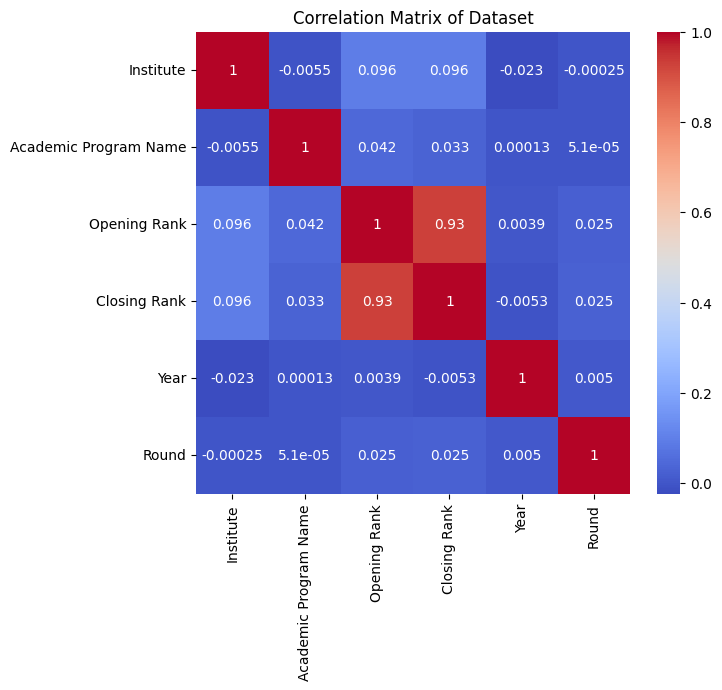

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.heatmap(data=df.corr(),annot=True, cmap="coolwarm")
corr_matrix = total.corr()

# Create heatmap with larger size
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=ax)
ax.set_title("Correlation Matrix of Dataset")

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
columns_to_scale = ['Opening Rank', 'Closing Rank', 'Year','Round']
scaler = StandardScaler()
scaler.fit(train[columns_to_scale])
train[columns_to_scale] = scaler.transform(train[columns_to_scale])
test[columns_to_scale] = scaler.transform(test[columns_to_scale])

train.head(2)

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Year,Round
0,41,46,AI,OPEN,Gender-Neutral,-0.108552,-0.099653,-0.7237,-1.427437
1,41,46,AI,OPEN,Female-only (including Supernumerary),0.120593,0.041491,-0.7237,-1.427437


In [ ]:
from sklearn.compose import ColumnTransformer
# transformer = ColumnTransformer(transformers=[
#     ('tnf1',SimpleImputer(),['fever']),
#     ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
#     ('tnf3',OneHotEncoder(sparse=False,drop='first'),['gender','city'])
# ],remainder='passthrough')
"""SimpleImputer is used to handle missing values in the dataset.
It replaces missing values in a column with a specified strategy, such as mean, median, mode,
or a user-defined constant value."""
transformer = ColumnTransformer(transformers=[
    ('tnf3',OneHotEncoder(sparse=False,drop='first'),['Quota', 'Seat Type', 'Gender'])
],remainder='passthrough')

x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)
print(x_test)

[[0.0000e+00 0.0000e+00 0.0000e+00 ... 1.1771e+04 2.0220e+03 1.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 2.0164e+04 2.0220e+03 1.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.7440e+03 2.0220e+03 1.0000e+00]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 2.4055e+04 2.0220e+03 6.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.2435e+04 2.0220e+03 6.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 5.4090e+03 2.0220e+03 6.0000e+00]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
y_train = train.iloc[:, 0].values.ravel()
y_test = test.iloc[:, 0].values.ravel()
y_train.shape

(86495,)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
regressor = LinearRegression()

# Train the model using the training sets
regressor.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(x_test)

# Print the performance metrics
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))
print(regressor.score(x_test, y_test))

Mean squared error: 601.12
Coefficient of determination (R^2): 0.33
0.33238338264436007


In [ ]:
from sklearn.metrics import confusion_matrix

# Convert the continuous target variable to binary classes
y_test_class = np.where(y_test > np.mean(y_train), 1, 0)
y_pred_class = np.where(y_pred > np.mean(y_train), 1, 0)

# Compute the confusion matrix
confusion_matrix = confusion_matrix(y_test_class, y_pred_class)
print(confusion_matrix)

[[22851  3214]
 [ 2185 30624]]


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Convert the continuous target variable to binary classes
y_test_class = np.where(y_test > np.mean(y_train), 1, 0)
y_pred_class = np.where(y_pred > np.mean(y_train), 1, 0)

# Compute the precision, recall, F1-score, and support
precision, recall, f1_score, support = precision_recall_fscore_support(y_test_class, y_pred_class)

# Print the result
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1_score)
print('Support:', support)


Precision: [0.91272568 0.90501803]
Recall: [0.87669288 0.93340242]
F1-score: [0.89434649 0.9189911 ]
Support: [26065 32809]


In [ ]:
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)

# Concatenate the two DataFrames
X = pd.concat([x_train_df, x_test_df])
X.shape

(145369, 19)

In [ ]:
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

# Concatenate the two DataFrames
Y = pd.concat([y_train_df, y_test_df])
Y.shape

(145369, 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Compute the classification report
cr = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(cr)
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Confusion Matrix:
[[ 65   0   2 ...   0   0   0]
 [  0  94   0 ...   0   0   0]
 [  5   2 175 ...   0   2   0]
 ...
 [  0   0   0 ...  11   0   0]
 [  0   0   3 ...   0 406   0]
 [  0   0   0 ...   0   0   4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.46      0.44       142
           1       0.76      0.76      0.76       124
           2       0.51      0.52      0.52       339
           3       0.48      0.38      0.42        29
           4       0.31      0.33      0.32        48
           5       0.44      0.45      0.44        38
           6       0.35      0.33      0.34        21
           7       0.65      0.65      0.65       725
           8       0.65      0.49      0.56        98
           9       0.25      0.29      0.27        55
          10       0.50      0.54      0.52        63
          11       0.19      0.23      0.21        13
          12       0.62      0.64      0.63       616
          

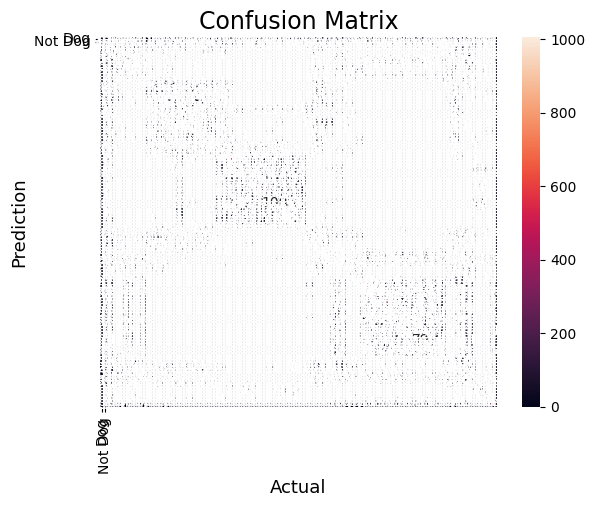

In [ ]:
#Import the necessary libraries
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_pred,y_test)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Dog','Not Dog'],
            yticklabels=['Dog','Not Dog'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the KNN classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy: 0.52


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Sample data (you should replace this with your dataset)
# Assume you have a dataset with features X and labels y
# X should be a 2D array-like object, and y should be a 1D array-like object.

# Split the dataset into a training set and a test s

# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(x_train, y_train)

# Predict labels for the test data
y_pred = nb_classifier.predict(x_test)

# Evaluate the classifier's performance (e.g., accuracy)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy: 0.03872876109238495


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Sample data (you should replace this with your dataset)
# Assume you have a dataset with features X and labels y
# X should be a 2D array-like object, and y should be a 1D array-like object.


# Split the dataset into a training set and a test set (adjust the test_size as needed)

# Create a Random Forest classifier with 100 trees (you can adjust n_estimators)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(x_train, y_train)

# Predict labels for the test data
y_pred = rf_classifier.predict(x_test)

# Evaluate the classifier's performance (e.g., accuracy)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


<ipython-input-21-bf874914a20a>:17: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

